In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


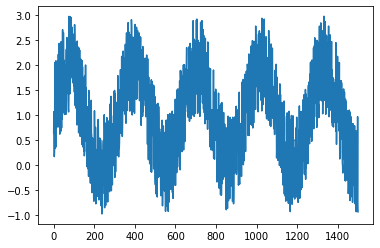

In [2]:
t = np.arange(0,1500)
x = np.sin(0.02*t)+ np.random.rand(1500) * 2
plt.plot(x)
plt.show()

In [0]:
train,test = x[0:1000], x[1000:]

In [0]:
step = 10

# convert into dataset data and label
def convertToDataset(data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

trainX,trainY =convertToDataset(train,step)
testX,testY =convertToDataset(test,step)

In [5]:
print(trainX.shape)
print(testX.shape)

(990, 10)
(490, 10)


In [0]:
trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))

In [7]:
print(trainX.shape)
print(testX.shape)

(990, 10, 1)
(490, 10, 1)


In [8]:
model = Sequential()
model.add(SimpleRNN(units=64, activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [9]:
history = model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)






Epoch 1/100





 - 1s - loss: 0.4926
Epoch 2/100
 - 0s - loss: 0.4133
Epoch 3/100
 - 0s - loss: 0.4011
Epoch 4/100
 - 0s - loss: 0.3874
Epoch 5/100
 - 0s - loss: 0.3901
Epoch 6/100
 - 0s - loss: 0.3887
Epoch 7/100
 - 0s - loss: 0.3877
Epoch 8/100
 - 0s - loss: 0.3789
Epoch 9/100
 - 0s - loss: 0.3765
Epoch 10/100
 - 0s - loss: 0.3743
Epoch 11/100
 - 0s - loss: 0.3764
Epoch 12/100
 - 0s - loss: 0.3664
Epoch 13/100
 - 0s - loss: 0.3650
Epoch 14/100
 - 0s - loss: 0.3657
Epoch 15/100
 - 0s - loss: 0.3637
Epoch 16/100
 - 0s - loss: 0.3575
Epoch 17/100
 - 0s - loss: 0.3583
Epoch 18/100
 - 0s - loss: 0.3542
Epoch 19/100
 - 0s - loss: 0.3512
Epoch 20/100
 - 0s - loss: 0.3495
Epoch 21/100
 - 0s - loss: 0.3508
Epoch 22/100
 - 0s - loss: 0.3369
Epoch 23/100
 - 0s - loss: 0.3404
Epoch 24/100
 - 0s - loss: 0.3363
Epoch 25/100
 - 0s - loss: 0.3393
Epoch 26/100
 - 0s - loss: 0.3345
Epoch 27/100
 - 0s - loss: 0.3288
Epoch 28/100
 - 0s - loss: 0.3239
Epoch 29/100
 - 0s - loss: 0.3263
Epoch 30/100


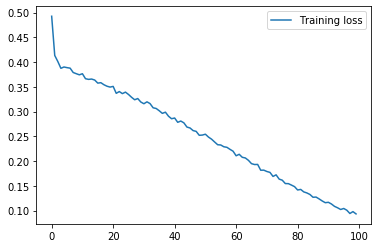

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
plt.plot(loss, label='Training loss')
plt.legend()

plt.show()

In [11]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.08492502550585102


In [0]:
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

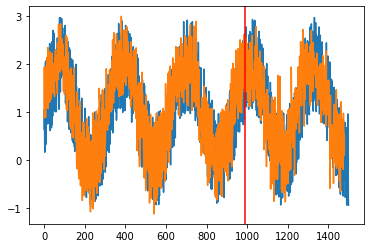

In [13]:
plt.plot(x)
plt.plot(predicted)
plt.axvline(len(trainX), c="r")
plt.show()

In [0]:
testX,testY =convertToDataset(test,50)

In [15]:
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))
testX.shape

(450, 50, 1)

In [16]:
testPredict= model.predict(testX)


ValueError: ignored

In [17]:
model.input

<tf.Tensor 'sequential_1_input:0' shape=(?, 10, 1) dtype=float32>